In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt





import pandas as pd
import numpy as np


## Load and Process Data

In [91]:
fires = pd.read_csv('/Users/danielschneider/Desktop/data/fires_algeria.csv')
fires.dropna(inplace=True)
fires.shape

fires.rename(columns={"month":'m','year':'y','Temperature':'temp',
                 ' RH':'humidity',' Ws':'wind_speed',
                 'Rain ':'mm_rain','FFMC':'ff_moist',
                 'DMC':'duff_moist','DC':'drought_code','ISI':'spread_index',
                'BUI':'buildup_index','FWI':'fire_weather_idx',
                'Classes  ':'class'},inplace=True)

fires.shape
fires = fires.convert_dtypes(convert_integer=True)
labels = fires['class']
fires = fires.apply(pd.to_numeric,errors='coerce')
fires['class'] = labels
fires['class'] = fires['class'].str.strip()
fires['class'] = fires['class'].str.replace(r'not fire',"not fire")
fires['class'] = fires['class'].str.replace(r'^fire',"fire")

fires = fires.drop(124)
fires





/Users/danielschneider/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


,day,m,y,temp,humidity,wind_speed,mm_rain,ff_moist,duff_moist,drought_code,spread_index,buildup_index,fire_weather_idx,class
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Create train and test data

In [98]:


labelencoder = LabelEncoder()
fires['class'] = labelencoder.fit_transform(fires['class'])
fires




train, test = train_test_split(fires,test_size=0.2)

train_x = train.loc[:,train.columns != 'class']
test_x = test.loc[:,test.columns != 'class']


np.random.shuffle(train_x.values)

train_class = train['class']
Y_train = np.expand_dims(train_class, axis=-1)
test_class = test['class']
y_test = np.expand_dims(test_class, axis=-1)

X_train = np.asarray(train_x.values)
x_test = np.asarray(test_x.values)
train_class.shape

norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train) 

X_train


array([[0.76666667, 1.        , 0.        , ..., 0.03157895, 0.16143498,
        0.01286174],
       [0.16666667, 0.33333333, 0.        , ..., 0.22631579, 0.23318386,
        0.20257235],
       [0.43333333, 0.        , 0.        , ..., 0.02631579, 0.07473842,
        0.0096463 ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.16315789, 0.122571  ,
        0.09967846],
       [0.8       , 0.66666667, 0.        , ..., 0.43157895, 0.80119581,
        0.65273312],
       [0.3       , 0.33333333, 0.        , ..., 0.05789474, 0.07025411,
        0.01607717]])

## Build the model

In [99]:
inputs = Input(shape=(13,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_func = Model(inputs=inputs, outputs=outputs)

# model = keras.Sequential(
#     [
#         layers.Dense(64, input_shape=(13,),activation="relu"),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(1, activation="sigmoid", name="output"),
#     ]
# )

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#              metric=['accuracy'])




## Running the model

In [5]:
# model.fit(X_train,y_train,batch_size=17,epochs=10,validation_split=0.2)



In [6]:
# model.evaluate(Y,y_test,verbose=0)

In [100]:
opt2 = keras.optimizers.SGD(learning_rate=0.1)
opt = keras.optimizers.Adam(learning_rate=0.01)

model_func.compile(
    optimizer=opt2,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

h = model_func.fit(X_train, Y_train,
                    batch_size= 17,
                    epochs= 28,
                  validation_split=0.21)

model_func.evaluate(x_test,y_test)

Train on 153 samples, validate on 41 samples
Epoch 1/28
153/153 [==============================] - 0s 3ms/sample - loss: 0.6887 - accuracy: 0.5490 - val_loss: 0.7111 - val_accuracy: 0.4634
Epoch 2/28
153/153 [==============================] - 0s 254us/sample - loss: 0.6827 - accuracy: 0.5752 - val_loss: 0.7192 - val_accuracy: 0.4634
Epoch 3/28
153/153 [==============================] - 0s 249us/sample - loss: 0.6811 - accuracy: 0.5752 - val_loss: 0.7218 - val_accuracy: 0.4634
Epoch 4/28
153/153 [==============================] - 0s 276us/sample - loss: 0.6806 - accuracy: 0.5752 - val_loss: 0.7251 - val_accuracy: 0.4634
Epoch 5/28
153/153 [==============================] - 0s 238us/sample - loss: 0.6780 - accuracy: 0.5752 - val_loss: 0.7248 - val_accuracy: 0.4634
Epoch 6/28
153/153 [==============================] - 0s 239us/sample - loss: 0.6811 - accuracy: 0.5752 - val_loss: 0.7239 - val_accuracy: 0.4634
Epoch 7/28
153/153 [==============================] - 0s 258us/sample - loss: 0.6

[96.32688467843192, 0.6122449]

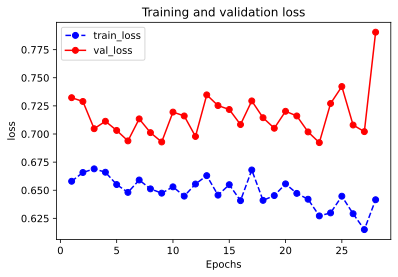

In [86]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(h, 'loss')

In [88]:
model_func.evaluate(x_test,y_test)
y_prob = model_func.predict(x_test)
y_prob[:-1]


49/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)